In [173]:
#setup matplotlib to plot inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [174]:
heart_disease= pd.read_csv("heart-disease.csv")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Comme notre variable cible est une catégorie (maladie cardiaque ou non), c’est quoi le type de
problème de ML qu’on doit résoudre ?

=> Il s'agit d'unp probleme de classification

In [175]:
#create X (all colonne except target)
X=heart_disease.iloc[:,:-1]

#create Y (only the target colum)
y= heart_disease.iloc[:,-1:]


In [176]:
# import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

#use train_test_split to spllit X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#View the differnet shapes of the training and test datasets

In [177]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [178]:
y_train

,target
132,1
202,0
196,0
75,1
176,0
...,...
188,0
71,1
106,1
270,0


In [179]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [180]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [181]:
#Import the RandomForestClasssifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier(max_depth=3, random_state=42)

3. Ajuster le modèle et faire des prédictions :

In [182]:
clf.fit(X_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_11816\2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=42)

In [183]:
y_preds= clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

4. Évaluer les prédictions du modèle :

In [184]:
#Evaluate the fitted model on the training set using the score() function
clf.score(X_train,y_train)

0.8760330578512396

In [185]:
#Evaluate the fitted model on the test set using the score() function
clf.score(X_test,y_test)

0.8852459016393442

Expérimenter différents modèles de classification

In [186]:
#Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

instancier un modèle dans un dictionnaire

In [187]:
models= {"LinearSVC": LinearSVC() ,
        "KNN":KNeighborsClassifier() ,
        "SVC": SVC(),
        "LogisticRegression":LogisticRegression(),
        "RandomForestClassifier":RandomForestClassifier()}

In [188]:
#Create an empty Dictionnaire named results
results ={}

In [189]:
#loop  through the models dictionary items,fitting the model on the training data
#and appending the model name and model score on the test data to the results dictionary
for model_name,model in models.items():
  model.fit(X_train,y_train)
  results[model_name]=model.score(X_test,y_test)

#view the reults
results

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

{'LinearSVC': 0.47540983606557374,
 'KNN': 0.6885245901639344,
 'SVC': 0.7049180327868853,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8524590163934426}

==> On remarque que le model le mieux fonctionné est LogisticRegression

==> on constate bien l'excution de cellule ci-dissus plusieurs fois gener des resultats differents
En raison du caractère aléatoire de la façon dont chaque modèle trouve des modèles dans les
données, vous remarquerez peut-être des résultats différents à chaque fois.
Sans définir manuellement l'état aléatoire à l'aide du paramètre random_state de certains
modèles ou en utilisant NumPy random seed, chaque fois que vous exécutez la cellule, vous
obtiendrez des résultats légèrement différents.


In [190]:
results_df= pd.DataFrame(results.items(),columns=["Model","Score"])

results_df

,Model,Score
0,LinearSVC,0.475410
1,KNN,0.688525
2,SVC,0.704918
3,LogisticRegression,0.885246
4,RandomForestClassifier,0.852459


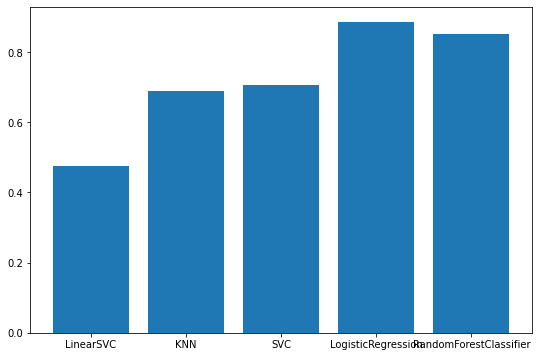

In [191]:
#create a barplot of the results dataFrame using plot.bar
plt.figure(figsize=(9,6))
plt.bar(results_df["Model"], results_df["Score"])
plt.show()

In [192]:
#Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4,4,20), "solver":["liblinear"]}

Puisque nous avons un ensemble d'hyperparamètres, nous pouvons importer RandomizedSearchCV, lui transmettre notre dictionnaire d'hyperparamètres et le laisser rechercher la meilleure combinaison.

In [193]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions= log_reg_grid, cv=5, n_iter=5)

#fit the instance of RandomizdSearchCV
rs_log_reg.fit(X_test,y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']})

Une fois que RandomizedSearchCV a terminé, nous pouvons trouver les meilleurs 
hyperparmètres trouvés en utilisant les attributs best_params_. 

In [194]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [195]:
#Score the instance RandomizedSearchCV using the test data : 
rs_log_reg.score(X_test, y_test)

0.9016393442622951